<a href="https://colab.research.google.com/github/LiyaUnknown/fashion_mnist_nn/blob/main/my_exam_to_my_self_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# loading data set 

data = tf.keras.datasets.fashion_mnist
(train_ , train_labels) , (test_ , test_labels) = data.load_data()

In [ ]:
# let's look at the data 
print(f'shapes of train data {train_.shape}')
print(f'shapes of train data {test_.shape}')

print(f'labels of training data {list(set(train_labels))}')
print(f'labels of test data {list(set(test_labels))}')

shapes of train data (60000, 28, 28)
shapes of train data (10000, 28, 28)
labels of training data [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels of test data [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


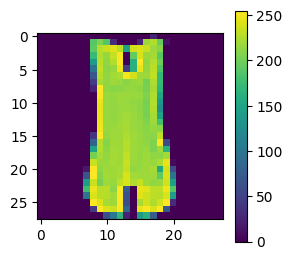

In [ ]:
# now we wnat to see what type of images we have 

plt.figure(figsize = (3,3))
plt.imshow(train_[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# convert training data betwin 0 and 1

train_ = train_ / 255.0
test_ = test_ / 255.0

In [ ]:
# making our model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28 , 28)))
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))


In [ ]:
# Now it's time to compile our modle 

op = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer = op , loss = loss , metrics=['accuracy'])

In [ ]:
# So , everything is already done and we can fit the model for train

epochs = 10
his = model.fit(train_ , train_labels , validation_data = (test_ , test_labels) , epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2312 - accuracy: 0.9134 - val_loss: 0.3366 - val_accuracy: 0.8865
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2261 - accuracy: 0.9155 - val_loss: 0.3340 - val_accuracy: 0.8840
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2192 - accuracy: 0.9169 - val_loss: 0.3486 - val_accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2132 - accuracy: 0.9208 - val_loss: 0.3409 - val_accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2083 - accuracy: 0.9222 - val_loss: 0.3551 - val_accuracy: 0.8827
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2018 - accuracy: 0.9245 - val_loss: 0.3376 - val_accuracy: 0.8887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1956 - accuracy: 0.9262 - val_loss: 0.3451 - val_accuracy:

In [ ]:
# lets see what kind of accuracy our model get with this training

loss_ , acc_ = model.evaluate(test_ , test_labels)

print(f'the accuracy of this model is {round(acc_ * 100)}')
print(f'the full loss of this model is {round(loss_ * 100)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8814
the accuracy of this model is 88
the full loss of this model is 38


In [ ]:
# this is the all information of model history
his.history

{'loss': [0.23118038475513458,
  0.22613656520843506,
  0.21920733153820038,
  0.21319594979286194,
  0.2083429992198944,
  0.20184741914272308,
  0.19560059905052185,
  0.19127662479877472,
  0.1871950775384903,
  0.18368065357208252],
 'accuracy': [0.9134166836738586,
  0.9154833555221558,
  0.916866660118103,
  0.9208166599273682,
  0.922249972820282,
  0.9245499968528748,
  0.9262166619300842,
  0.9280166625976562,
  0.9293833374977112,
  0.930400013923645],
 'val_loss': [0.3365740478038788,
  0.3339518904685974,
  0.3486163318157196,
  0.3408956229686737,
  0.35507869720458984,
  0.337617427110672,
  0.3450685739517212,
  0.42077767848968506,
  0.36533600091934204,
  0.38027381896972656],
 'val_accuracy': [0.8865000009536743,
  0.8840000033378601,
  0.8812000155448914,
  0.8867999911308289,
  0.8827000260353088,
  0.888700008392334,
  0.8877999782562256,
  0.8769000172615051,
  0.8873999714851379,
  0.8813999891281128]}

<Figure size 500x500 with 0 Axes>

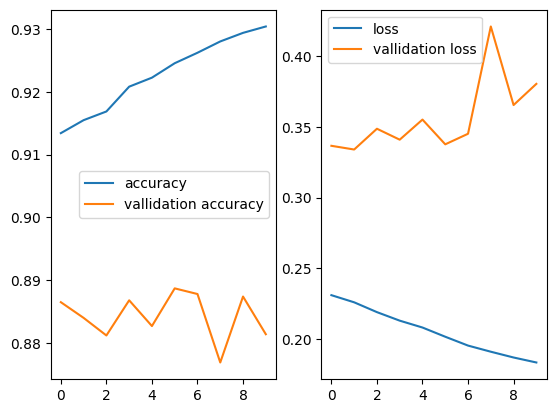

In [ ]:
# plot the information of model

plt.figure(figsize = (5 , 5))

loss_spot = his.history['loss']
acc_spot = his.history['accuracy']
val_loss_spot = his.history['val_loss']
val_acc_spot = his.history['val_accuracy']

epoch_range = range(epochs)

fig , axis = plt.subplots(1,2)

axis[0].plot(epoch_range , acc_spot , label = 'accuracy')
axis[0].plot(epoch_range , val_acc_spot , label = 'vallidation accuracy')
plt.legend()


axis[1].plot(epoch_range , loss_spot , label = 'loss')
axis[1].plot(epoch_range , val_loss_spot , label = 'vallidation loss')

axis[0].legend()
axis[1].legend()
plt.show()

In [ ]:
# let's try some prediction in our model

label_names = ['Tshirt\Top' ,'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']

prediction = model.predict(test_)
image_value = 10
image_name = label_names[np.argmax(prediction[image_value])]

image_name

313/313 [==============================] - 1s 3ms/step


'Coat'

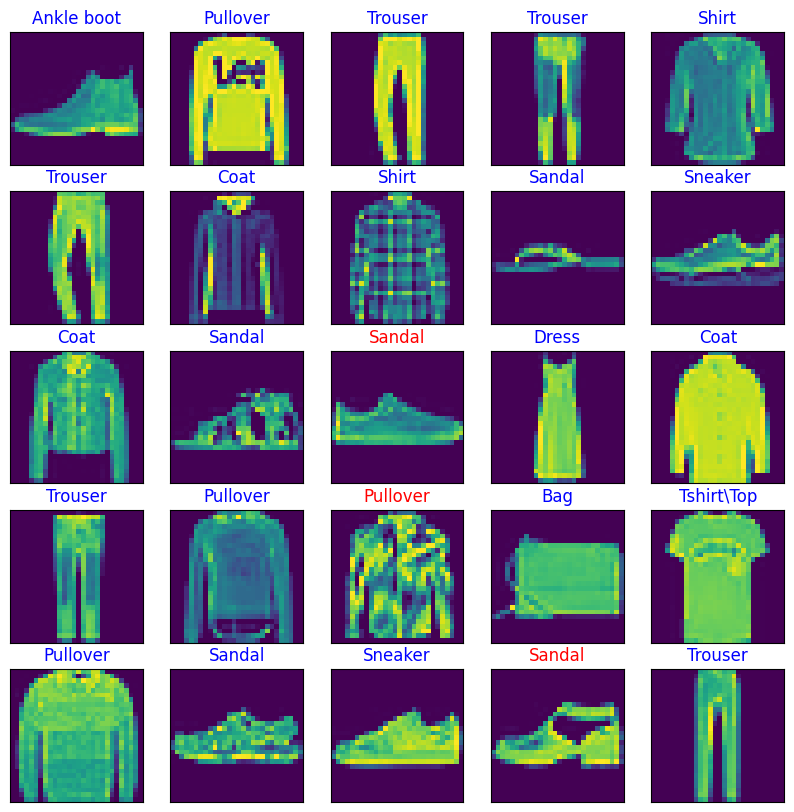

In [ ]:
# plot the image with predicted label

plt.figure(figsize = (10 , 10))

for value in range(25) : 
    plt.subplot(5,5,value+1)
    plt.imshow(test_[value])
    plt.xticks([])
    plt.yticks([])

    lbl_color = 'blue' if np.argmax(prediction[value]) == test_labels[value] else 'red'
    plt.title(label_names[np.argmax(prediction[value])] , color = lbl_color)

plt.show()